<a href="https://colab.research.google.com/github/ramesitexp/DataScience_Zone/blob/main/01_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>




# Objetive

### The objetive of this use case is to use linear regression to predict life expectancy and understand how factors like immunization, mortality, income, and social conditions affect how long people live.

In [2]:
import pandas as pd


In [4]:
life_expectancy_data_df = pd.read_csv('life_expectancy_data.csv')

#Exploratory Data Analysis (EDA)

 Use visualizations and summary statistics to understand a dataset's main features, uncover patterns, detect anomalies, and identify relationships between variables

In [5]:
life_expectancy_data_df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [6]:
life_expectancy_data_df['Country'].head()

,Country
0,Afghanistan
1,Afghanistan
2,Afghanistan
3,Afghanistan
4,Afghanistan


In [7]:
life_expectancy_data_df[['Country','Year']].head()

,Country,Year
0,Afghanistan,2015
1,Afghanistan,2014
2,Afghanistan,2013
3,Afghanistan,2012
4,Afghanistan,2011


In [8]:
life_expectancy_data_df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [34]:
display(life_expectancy_data_df[['Life expectancy ', ' HIV/AIDS', ' thinness 5-9 years']].head())

,Life expectancy,HIV/AIDS,thinness 5-9 years
0,65.0,0.1,17.3
1,59.9,0.1,17.5
2,59.9,0.1,17.7
3,59.5,0.1,18.0
4,59.2,0.1,18.2


In [35]:
life_expectancy_data_df.shape

(2938, 22)

In [36]:
life_expectancy_data_df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [37]:
life_expectancy_data_df['Life expectancy '].max()

89.0

In [38]:
life_expectancy_data_df['Life expectancy '].min()

36.3

In [39]:
life_expectancy_data_df[life_expectancy_data_df['Life expectancy '] == 36.3][['Country','Year']]

,Country,Year
1127,Haiti,2010


In [40]:
display(life_expectancy_data_df[life_expectancy_data_df['Country']=='Afghanistan'].head(10))

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,...,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,Afghanistan,2008,Developing,58.1,287.0,80,0.03,25.873925,64.0,1599,...,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,Afghanistan,2007,Developing,57.5,295.0,82,0.02,10.910156,63.0,1141,...,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
9,Afghanistan,2006,Developing,57.3,295.0,84,0.03,17.171518,64.0,1990,...,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1


In [41]:
life_expectancy_data_df[(life_expectancy_data_df['Country']=='Afghanistan') &
                        (life_expectancy_data_df['Life expectancy ']> 58)]

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,...,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,Afghanistan,2008,Developing,58.1,287.0,80,0.03,25.873925,64.0,1599,...,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7


In [43]:
display(life_expectancy_data_df[life_expectancy_data_df['Country'].isin(['India', 'Pakistan'])])

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1186,India,2015,Developing,68.3,181.0,910,NaN,0.000000,87.0,90387,...,86.0,NaN,87.0,0.2,1613.188780,1.395398e+06,26.7,27.3,0.615,11.6
1187,India,2014,Developing,68.0,184.0,957,3.07,86.521539,79.0,79563,...,84.0,4.69,85.0,0.2,1573.118890,1.293859e+09,26.8,27.4,0.607,11.6
1188,India,2013,Developing,67.6,187.0,1000,3.11,67.672304,7.0,13822,...,82.0,4.53,83.0,0.2,1452.195373,1.278562e+08,26.8,27.5,0.599,11.5
1189,India,2012,Developing,67.3,19.0,1100,3.10,64.969645,73.0,18668,...,79.0,4.39,82.0,0.2,1446.985410,1.263659e+08,26.9,27.6,0.590,11.3
1190,India,2011,Developing,66.8,193.0,1100,3.00,64.605901,44.0,33634,...,79.0,4.33,82.0,0.2,1461.671957,1.247236e+08,26.9,27.7,0.580,10.8
1191,India,2010,Developing,66.4,196.0,1200,2.77,57.733599,38.0,31458,...,76.0,4.28,79.0,0.2,1345.771530,1.239869e+07,27.0,27.8,0.569,10.4
1192,India,2009,Developing,66.0,2.0,1300,2.50,0.844186,37.0,56188,...,73.0,4.38,74.0,0.2,19.317765,1.214271e+08,27.0,27.8,0.563,10.5
1193,India,2008,Developing,65.5,23.0,1300,1.93,43.030433,29.0,44258,...,69.0,4.34,7.0,0.3,991.484634,1.197147e+08,27.0,27.9,0.556,10.2
1194,India,2007,Developing,65.2,26.0,1400,1.59,5.234770,6.0,41144,...,67.0,4.23,64.0,0.3,118.166373,1.179681e+09,27.1,28.0,0.546,9.9
1195,India,2006,Developing,64.8,28.0,1500,1.37,34.859427,6.0,64185,...,66.0,4.25,65.0,0.3,792.259698,1.161978e+09,27.1,28.0,0.536,9.7


In [44]:
# Explain me this code along with why are doing this?
life_expectancy_data_df[(life_expectancy_data_df['Status']=='Developing')

                        & ((life_expectancy_data_df['GDP'] > life_expectancy_data_df['GDP'].mean())

                           | (life_expectancy_data_df['Life expectancy '] > life_expectancy_data_df['Life expectancy '].mean()))

                        ]

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
16,Albania,2015,Developing,77.8,74.0,0,4.60,364.975229,99.0,0,...,99.0,6.00,99.0,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2
17,Albania,2014,Developing,77.5,8.0,0,4.51,428.749067,98.0,0,...,98.0,5.88,98.0,0.1,4575.763787,288914.0,1.2,1.3,0.761,14.2
18,Albania,2013,Developing,77.2,84.0,0,4.76,430.876979,99.0,0,...,99.0,5.66,99.0,0.1,4414.723140,289592.0,1.3,1.4,0.759,14.2
19,Albania,2012,Developing,76.9,86.0,0,5.14,412.443356,99.0,9,...,99.0,5.59,99.0,0.1,4247.614380,2941.0,1.3,1.4,0.752,14.2
20,Albania,2011,Developing,76.6,88.0,0,5.37,437.062100,99.0,28,...,99.0,5.71,99.0,0.1,4437.178680,295195.0,1.4,1.5,0.738,13.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2885,Viet Nam,2004,Developing,74.2,136.0,29,2.86,0.000000,94.0,217,...,96.0,5.90,96.0,0.2,NaN,NaN,15.4,16.1,0.601,11.0
2886,Viet Nam,2003,Developing,74.0,137.0,30,2.19,0.000000,78.0,2297,...,96.0,4.84,99.0,0.2,NaN,NaN,15.6,16.2,0.592,10.9
2887,Viet Nam,2002,Developing,73.8,137.0,30,2.03,0.000000,NaN,6755,...,92.0,4.70,75.0,0.2,NaN,NaN,15.6,16.3,0.584,10.7
2888,Viet Nam,2001,Developing,73.6,138.0,32,1.84,0.000000,NaN,12058,...,96.0,5.17,96.0,0.1,NaN,NaN,15.7,16.4,0.576,10.6


In [45]:
life_expectancy_data_df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [48]:
life_expectancy_data_df['Country'].nunique()

193

In [49]:
display(life_expectancy_data_df['Year'].nunique())

16

In [50]:
above_mean_life_expectancy_df = life_expectancy_data_df[life_expectancy_data_df['Life expectancy '] > 70]

# above_mean_life_expectancy_df = life_expectancy_data_df[
#     life_expectancy_data_df['Life expectancy '] >
#     life_expectancy_data_df['Life expectancy '].mean()
# ]


In [51]:
above_mean_life_expectancy_df.shape

(1620, 22)

In [52]:
print(df_above_mean_life_expectancy['Country'].nunique())

120


In [53]:
global_mean_life_expectancy = life_expectancy_data_df['Life expectancy '].mean()
df_above_mean_life_expectancy = life_expectancy_data_df[life_expectancy_data_df['Life expectancy '] > global_mean_life_expectancy]

print(f"Global Mean Life Expectancy: {global_mean_life_expectancy:.2f}")
print(f"Shape of DataFrame with life expectancy above mean: {df_above_mean_life_expectancy.shape}")

Global Mean Life Expectancy: 69.22
Shape of DataFrame with life expectancy above mean: (1696, 22)


In [54]:
num_unique_countries_above_mean = df_above_mean_life_expectancy['Country'].nunique()
print(f"Number of unique countries with life expectancy above global mean: {num_unique_countries_above_mean}")

Number of unique countries with life expectancy above global mean: 120


In [55]:
print(f"{df_above_mean_life_expectancy.shape[0]} records correspond to countries with above-mean life expectancy.")

1696 records correspond to countries with above-mean life expectancy.


In [56]:
total_records = life_expectancy_data_df.shape[0]
above_mean_records = df_above_mean_life_expectancy.shape[0]
percentage = (above_mean_records / total_records) * 100
print(f"{percentage:.2f}% of total records represent above-mean life expectancy values.")

57.73% of total records represent above-mean life expectancy values.


In [57]:
developing_above_mean_le = df_above_mean_life_expectancy[df_above_mean_life_expectancy['Status'] == 'Developing']
print(f"{developing_above_mean_le['Country'].nunique()} developing countries have an above-mean life expectancy.")

88 developing countries have an above-mean life expectancy.


In [ ]:
# Create a new DataFrame that contains only records where GDP is above the mean.
# Find and complete answers for all questions similar to the above-mean life expectancy tasks.


In [58]:
global_mean_gdp = life_expectancy_data_df['GDP'].mean()
df_above_mean_gdp = life_expectancy_data_df[life_expectancy_data_df['GDP'] > global_mean_gdp]
print(f"Global Mean GDP: {global_mean_gdp:.2f}")
print(f"Shape of DataFrame with GDP above mean: {df_above_mean_gdp.shape}")

Global Mean GDP: 7483.16
Shape of DataFrame with GDP above mean: (540, 22)


In [59]:
life_expectancy_data_df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [60]:
life_expectancy_data_df['Status'].value_counts()

,count
Status,
Developing,2426
Developed,512


In [61]:
display(life_expectancy_data_df['Year'].value_counts().sort_index())

,count
Year,
2000,183
2001,183
2002,183
2003,183
2004,183
2005,183
2006,183
2007,183
2008,183


In [62]:
display(life_expectancy_data_df['Country'].value_counts().idxmax())

'Afghanistan'

In [63]:
data = {
    'Status': [
        'Developing','Developing','Developing','Developing','Developing',
        'Developed','Developed','Developed','Developed','Developed'
    ],
    'Life expectancy ': [60, 62, 58, 60, 60, 80, 82, 78, 80, 80]
}

In [64]:
example_df = pd.DataFrame(data)

In [ ]:
example_df

,Status,Life expectancy
0,Developing,60
1,Developing,62
2,Developing,58
3,Developing,60
4,Developing,60
5,Developed,80
6,Developed,82
7,Developed,78
8,Developed,80
9,Developed,80


In [65]:
example_df.groupby('Status')['Life expectancy '].mean()

,Life expectancy
Status,
Developed,80.0
Developing,60.0


In [ ]:
# Filter vs value count vs group by

In [66]:
display(life_expectancy_data_df.groupby('Status')['GDP'].mean())

,GDP
Status,
Developed,22053.386446
Developing,4286.556053


In [67]:
display(life_expectancy_data_df.groupby('Year')['Life expectancy '].mean())

,Life expectancy
Year,
2000,66.750273
2001,67.128962
2002,67.351366
2003,67.433333
2004,67.646448
2005,68.209290
2006,68.667760
2007,69.036066
2008,69.427869


In [68]:
display(life_expectancy_data_df.groupby('Year')['Population'].sum())

,Population
Year,
2000,1.349983e+09
2001,1.440091e+09
2002,9.474219e+08
2003,1.452862e+09
2004,2.409978e+09
2005,2.614304e+09
2006,2.197286e+09
2007,2.650548e+09
2008,1.356747e+09


In [69]:
life_expectancy_data_df.groupby(['Status', 'Country'])['Life expectancy '].mean().sort_values(ascending=False)

Status      Country              
Developed   Japan                    82.53750
            Sweden                   82.51875
            Iceland                  82.44375
            Switzerland              82.33125
Developing  France                   82.21875
                                       ...   
            Niue                          NaN
            Palau                         NaN
            Saint Kitts and Nevis         NaN
            San Marino                    NaN
            Tuvalu                        NaN
Name: Life expectancy , Length: 193, dtype: float64

In [70]:
life_expectancy_data_df.groupby("Status").agg(
    avg_expectancy =("Life expectancy ", "mean"),
    max_GDP=("GDP", "max"),
    min_GDP=("GDP", "min"),
    cnt=("Country", "count")
)

,avg_expectancy,max_GDP,min_GDP,cnt
Status,,,,
Developed,79.197852,119172.74180,12.27733,512
Developing,67.111465,88564.82298,1.68135,2426


In [71]:
display(life_expectancy_data_df.groupby('Country')['Population'].mean())

,Population
Country,
Afghanistan,9.972260e+06
Albania,6.969116e+05
Algeria,2.164983e+07
Angola,1.014710e+07
Antigua and Barbuda,NaN
...,...
Venezuela (Bolivarian Republic of),NaN
Viet Nam,NaN
Yemen,NaN


In [73]:
pd.crosstab(
    life_expectancy_data_df['Status'],
    life_expectancy_data_df['Year']
)

Year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Status,,,,,,,,,,,,,,,,
Developed,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32
Developing,151,151,151,151,151,151,151,151,151,151,151,151,151,161,151,151


In [74]:
pd.crosstab(
    life_expectancy_data_df['Status'],
    life_expectancy_data_df['Life expectancy '] > life_expectancy_data_df['Life expectancy '].mean()
)

Life expectancy,False,True
Status,,
Developed,0,512
Developing,1242,1184


In [ ]:
#value counts vs group by vs crosstab

In [ ]:
# Think like a Data SME and understand the dataset thoroughly all columns using the above functions


array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Life expectancy '}>,
        <Axes: title={'center': 'Adult Mortality'}>,
        <Axes: title={'center': 'infant deaths'}>],
       [<Axes: title={'center': 'Alcohol'}>,
        <Axes: title={'center': 'percentage expenditure'}>,
        <Axes: title={'center': 'Hepatitis B'}>,
        <Axes: title={'center': 'Measles '}>],
       [<Axes: title={'center': ' BMI '}>,
        <Axes: title={'center': 'under-five deaths '}>,
        <Axes: title={'center': 'Polio'}>,
        <Axes: title={'center': 'Total expenditure'}>],
       [<Axes: title={'center': 'Diphtheria '}>,
        <Axes: title={'center': ' HIV/AIDS'}>,
        <Axes: title={'center': 'GDP'}>,
        <Axes: title={'center': 'Population'}>],
       [<Axes: title={'center': ' thinness  1-19 years'}>,
        <Axes: title={'center': ' thinness 5-9 years'}>,
        <Axes: title={'center': 'Income composition of resources'}>,
        <Axes: title={'center

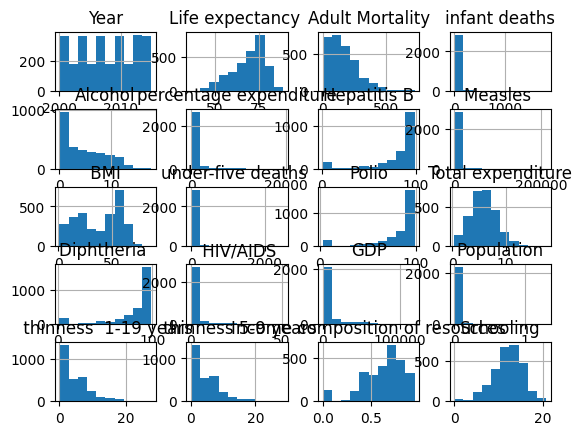

In [76]:
life_expectancy_data_df.hist()


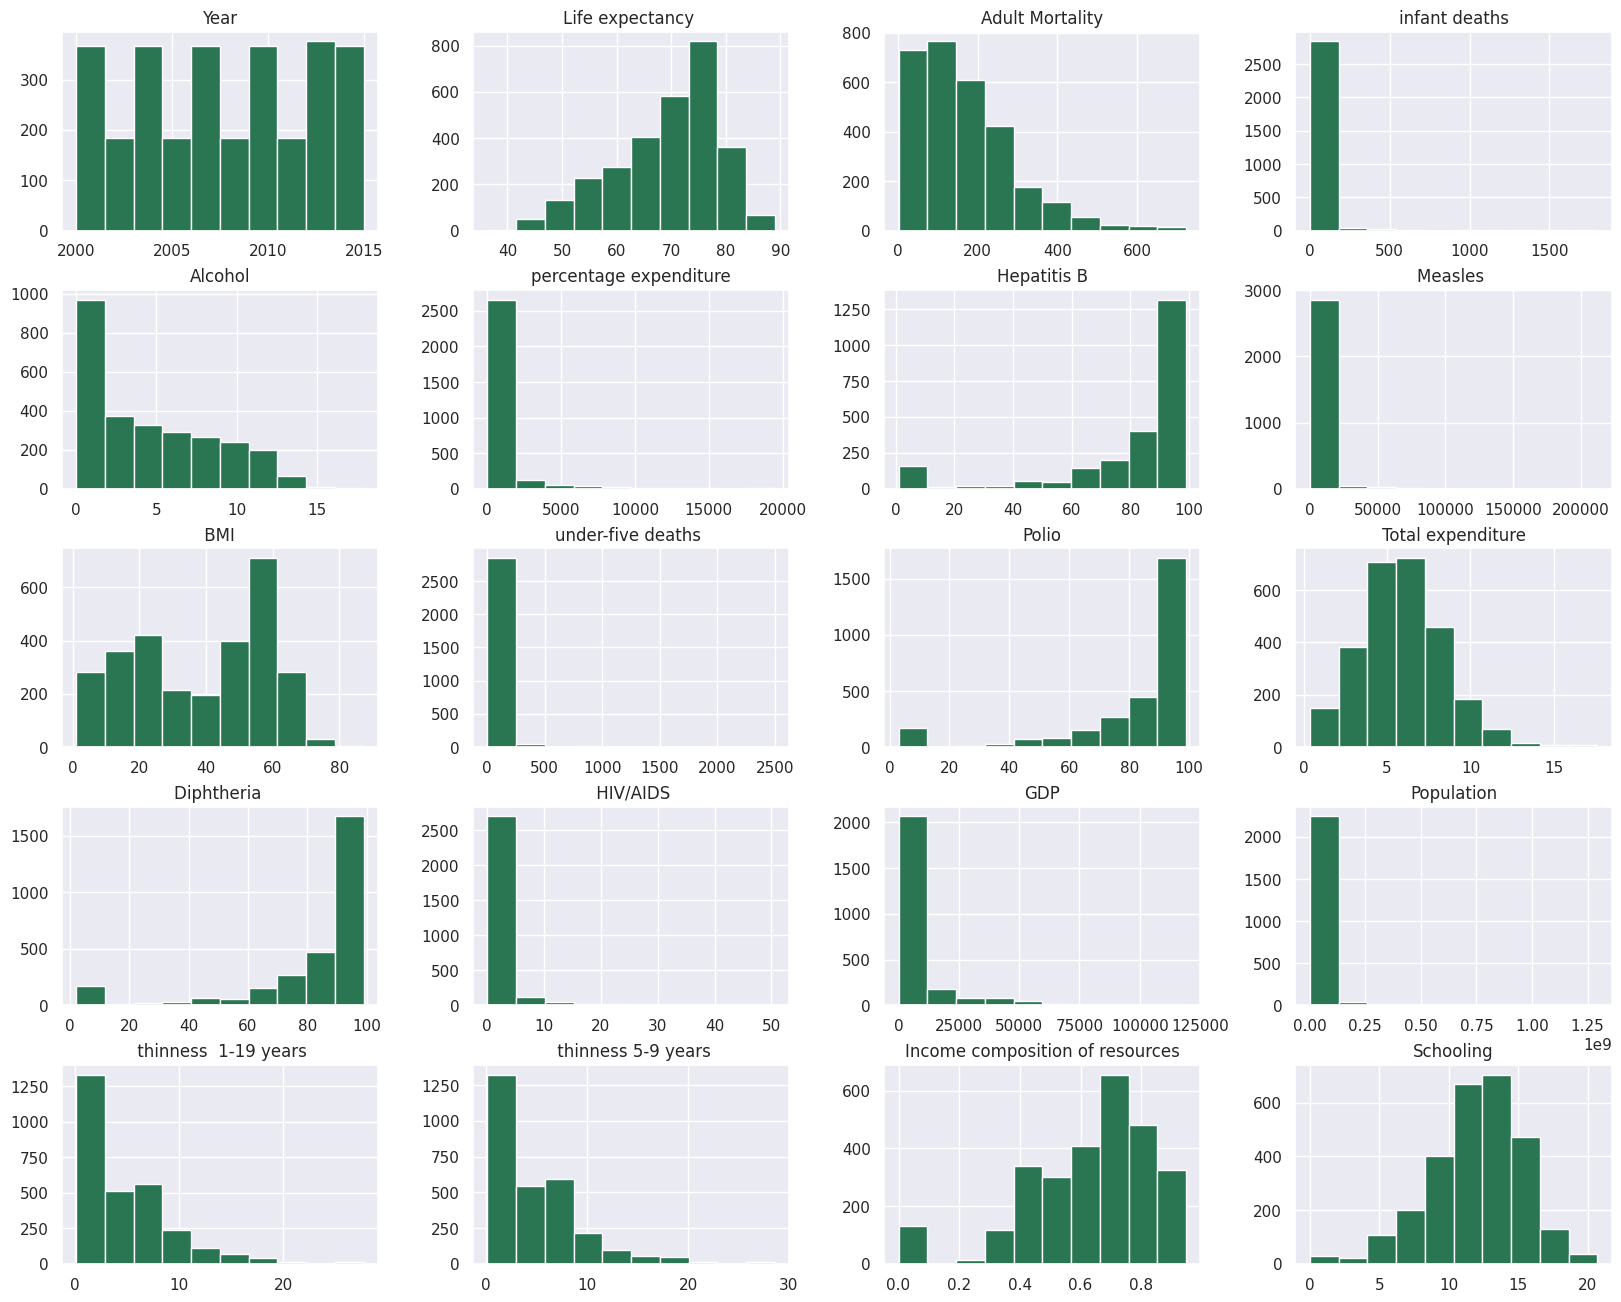

In [78]:
import seaborn as sns

sns.set(rc={"figure.figsize" : (20, 16)})
life_expectancy_data_df.hist(color="#2a7552");

#### How is the data distributed? Write your answer below


In [79]:
import matplotlib.pyplot as plt


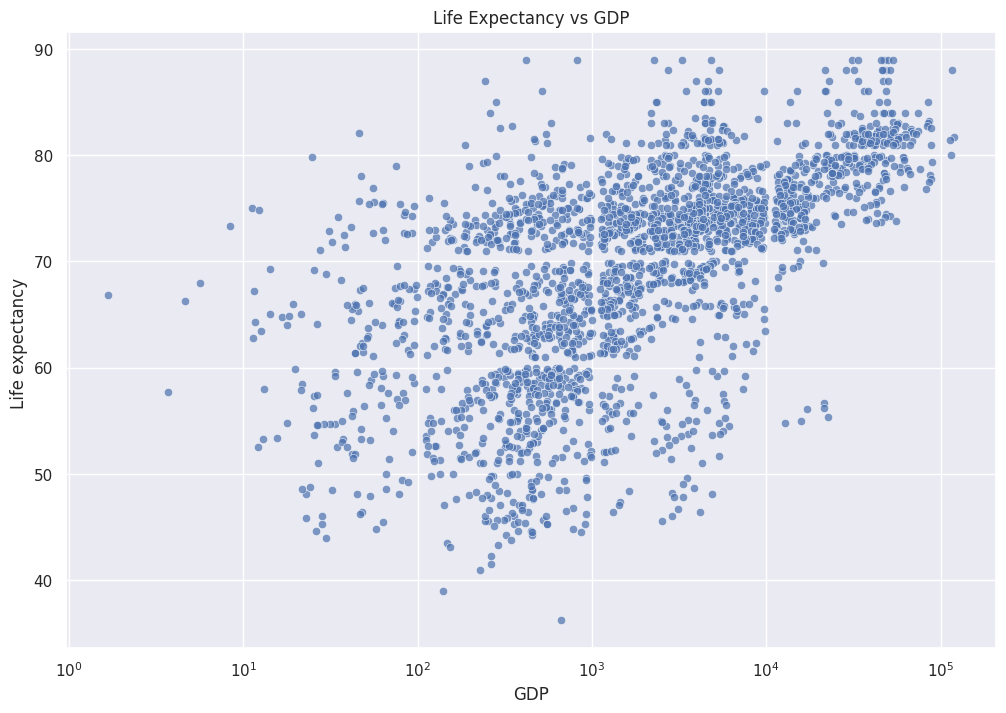

In [80]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=life_expectancy_data_df, x="GDP", y="Life expectancy ",
                alpha=0.7)
plt.xscale("log")
plt.title("Life Expectancy vs GDP")
plt.show()

Write 2–3 observations based on what you see



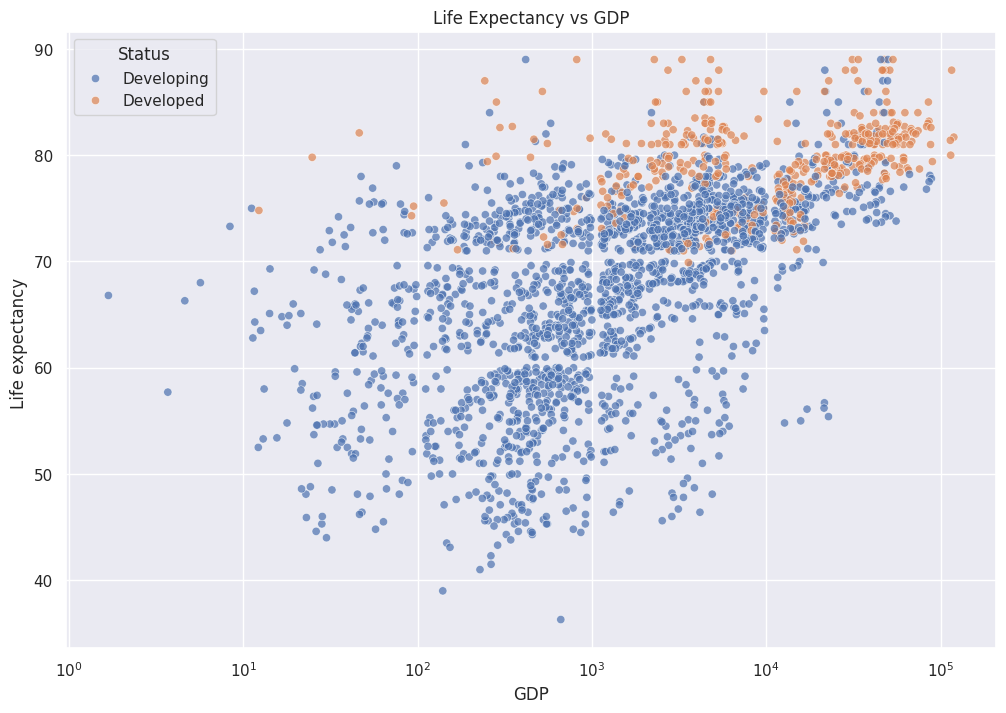

In [81]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=life_expectancy_data_df, x="GDP", y="Life expectancy ",hue="Status",
                alpha=0.7)
plt.xscale("log")  # Using log scale due to GDP's skewed distribution
plt.title("Life Expectancy vs GDP")
plt.show()

Write 2–3 observations based on what you see

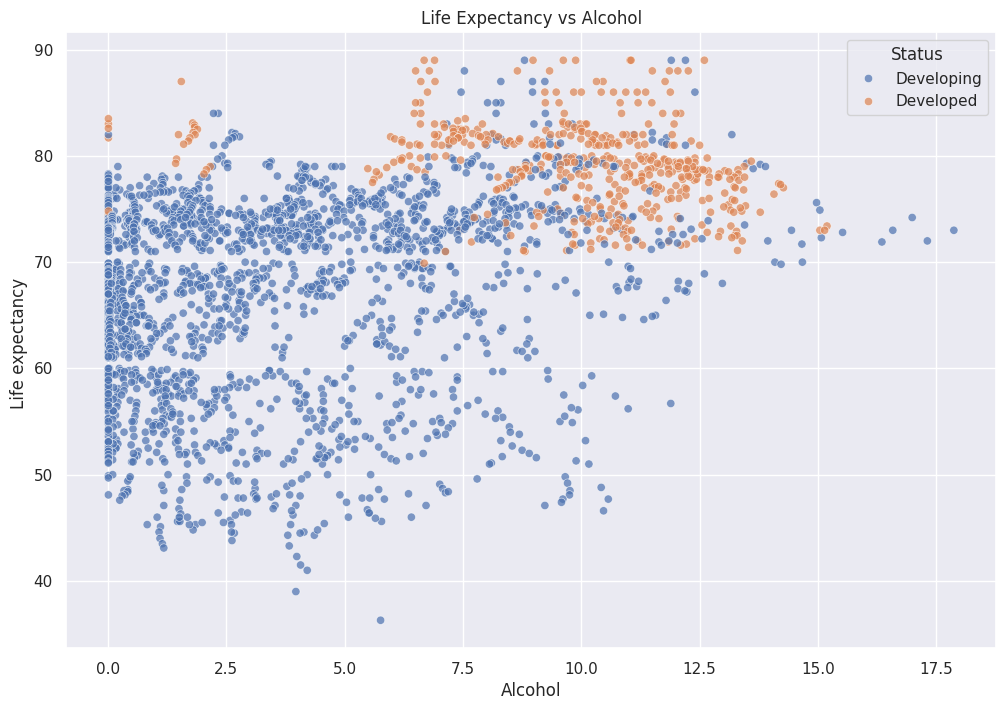

In [82]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=life_expectancy_data_df, x="Alcohol", y="Life expectancy ", hue="Status", alpha=0.7)
plt.title("Life Expectancy vs Alcohol")
plt.show()

Write bservations based on what you see?

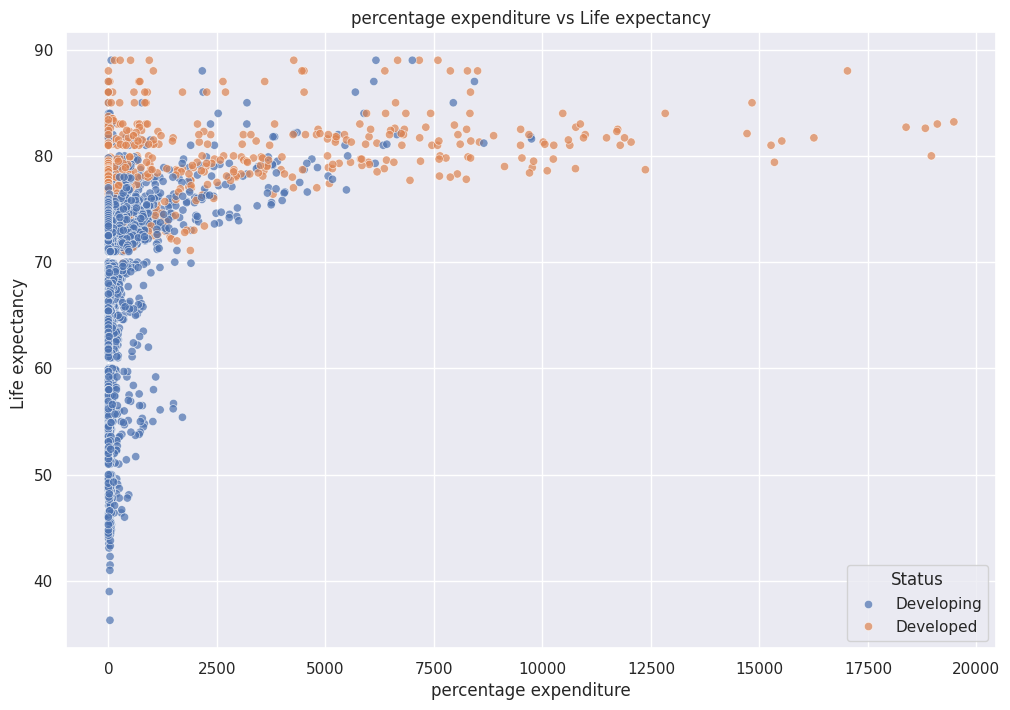

In [83]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=life_expectancy_data_df, x="percentage expenditure", y="Life expectancy ",
               hue="Status", alpha=0.7)
plt.title("percentage expenditure vs Life expectancy")
plt.show()

Write bservations based on what you see

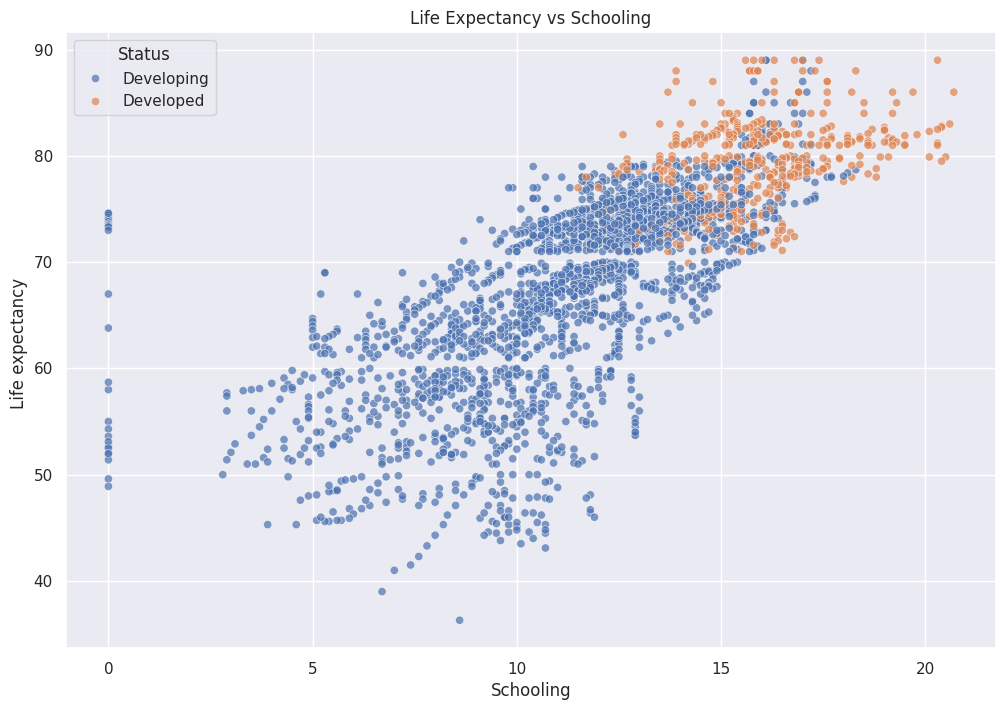

In [84]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=life_expectancy_data_df, x="Schooling", y="Life expectancy ", hue="Status", alpha=0.7)
plt.title("Life Expectancy vs Schooling")
plt.show()

Write Observations based on what you see?

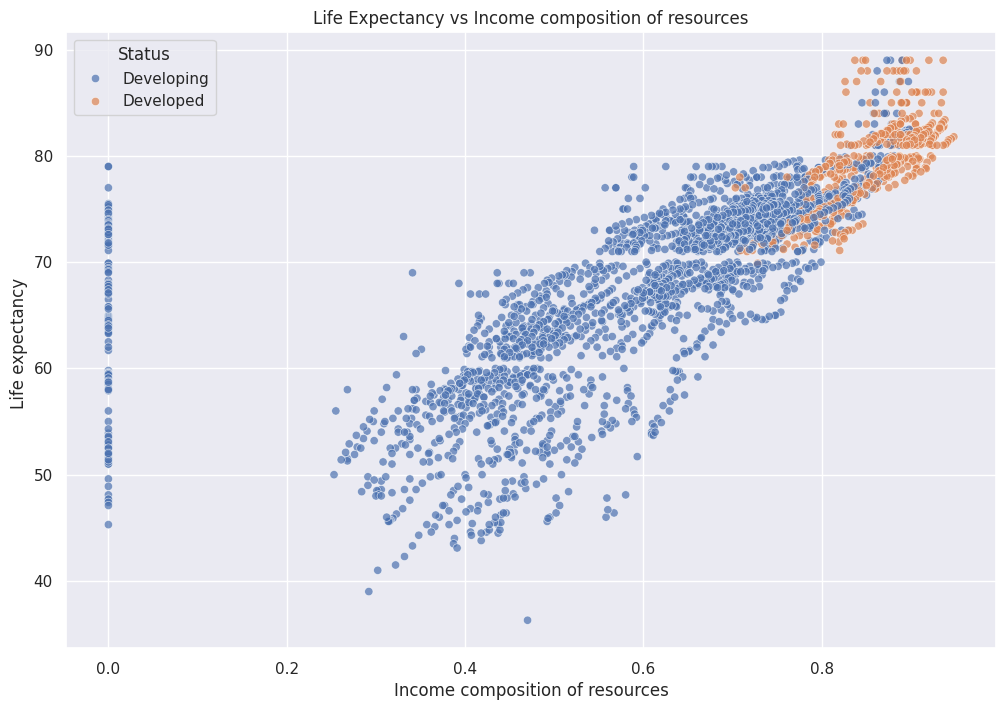

In [85]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=life_expectancy_data_df, x="Income composition of resources", y="Life expectancy ", hue="Status", alpha=0.7)
plt.title("Life Expectancy vs Income composition of resources")
plt.show()

Write Observations based on what you see?

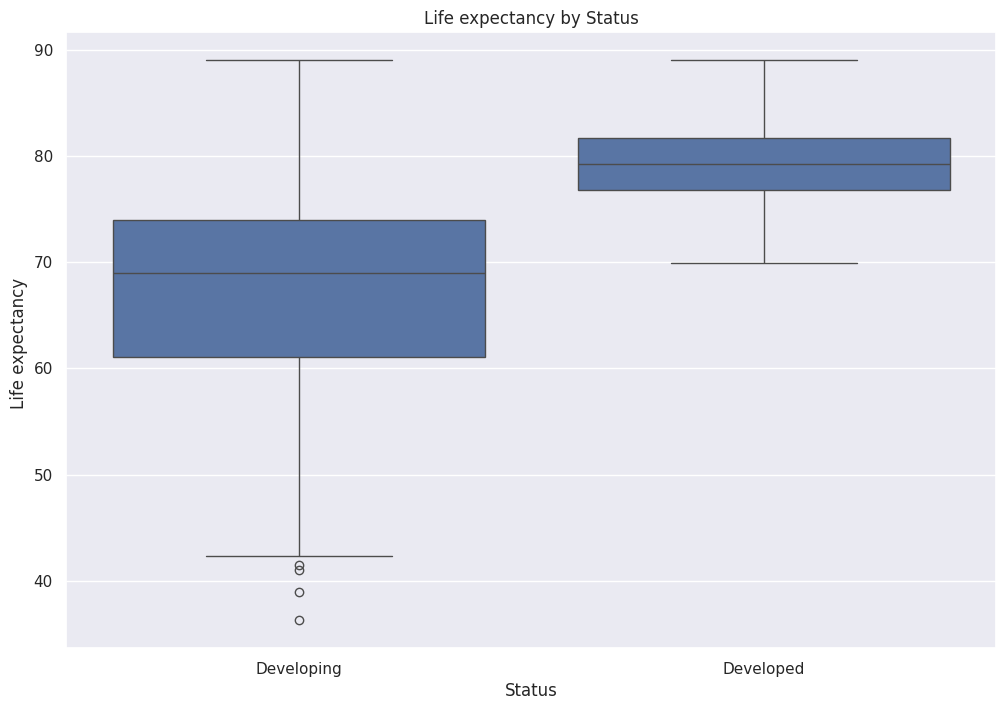

In [87]:
#Life expectancy by Status:

plt.figure(figsize=(12,8))
sns.boxplot(data=life_expectancy_data_df, x="Status", y="Life expectancy ")
plt.title("Life expectancy by Status")
plt.show()

## Quartiles and Interquartile Range (IQR)

Values = [10, 20, 30, 40, 50, 60, 70, 80]

Q2 (Median):

(40 + 50) / 2 = 45

Q2 = 45

Q1 (First Quartile)


Lower half:

[10, 20, 30, 40]

(20 + 30) / 2 = 25

Q1 = 25


Q3 (Third Quartile):

Upper half:

[50, 60, 70, 80]

(60 + 70) / 2 = 65

Q3 = 65

Q4 = 80


Interquartile Range (IQR)

IQR = Q3 − Q1
IQR = 65 − 25 = 40



In [89]:
values = [10, 20, 30, 40, 50, 60, 70, 200]

In [90]:
import numpy as np

Q1 = np.percentile(values, 25)
Q3 = np.percentile(values, 75)
IQR = Q3 - Q1

Q1, Q3, IQR


(np.float64(27.5), np.float64(62.5), np.float64(35.0))

In [91]:
IQR

np.float64(35.0)

In [92]:
Q1

np.float64(27.5)

In [93]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound, upper_bound


(np.float64(-25.0), np.float64(115.0))

In [94]:
lower_bound

np.float64(-25.0)

In [95]:
upper_bound

np.float64(115.0)

In [96]:
outliers = [x for x in values if x < lower_bound or x > upper_bound]
outliers


[200]

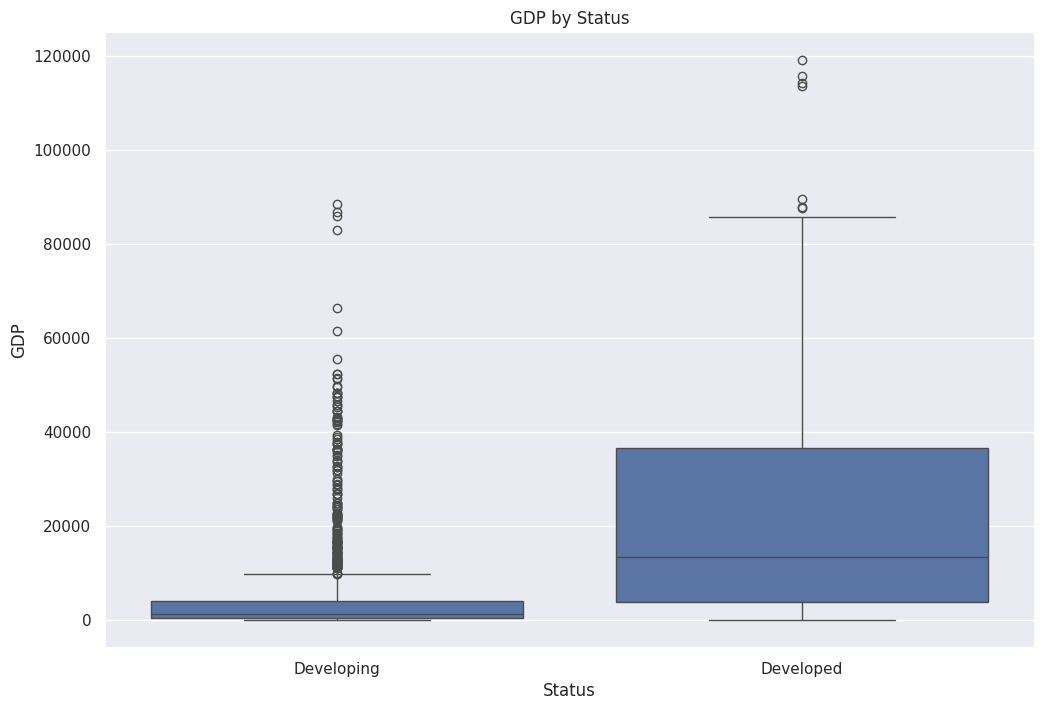

In [97]:
plt.figure(figsize=(12,8))
sns.boxplot(data=life_expectancy_data_df, x="Status", y="GDP")
plt.title("GDP by Status")
plt.show()

Write Observations based on what you see?

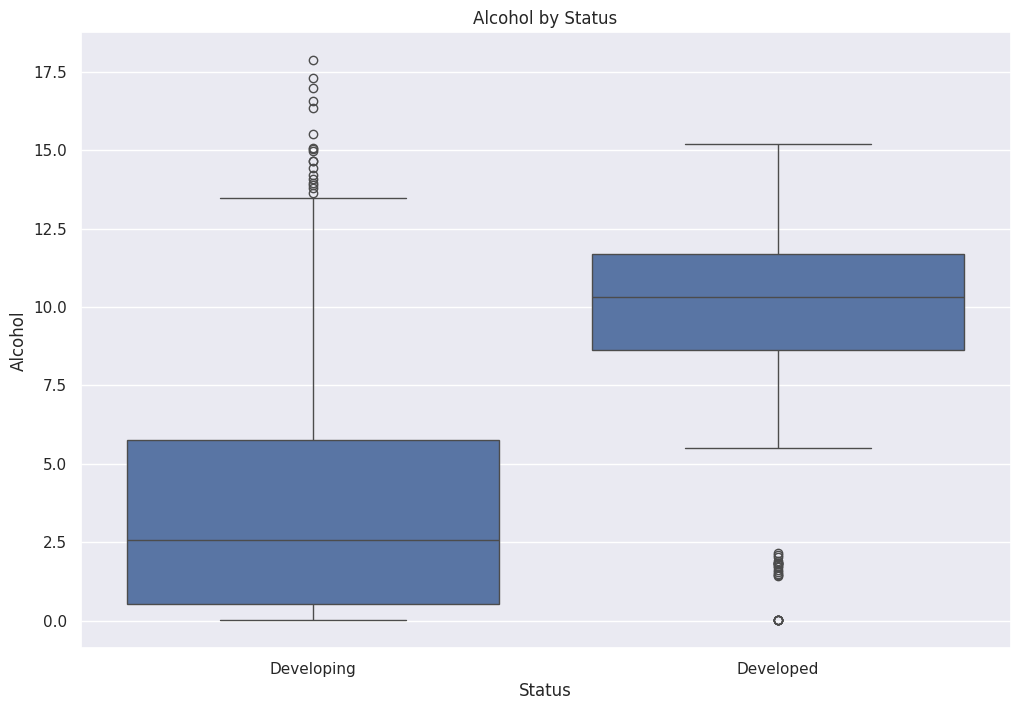

In [98]:
plt.figure(figsize=(12,8))
sns.boxplot(data=life_expectancy_data_df, x="Status", y="Alcohol")
plt.title("Alcohol by Status")
plt.show()

Write Observations based on what you see?

In [99]:
# Plot
#Schooling by Status:
#percentage expenditure by Status:
#HIV/AIDS by Status:
#thinness 5-9 years by Status:


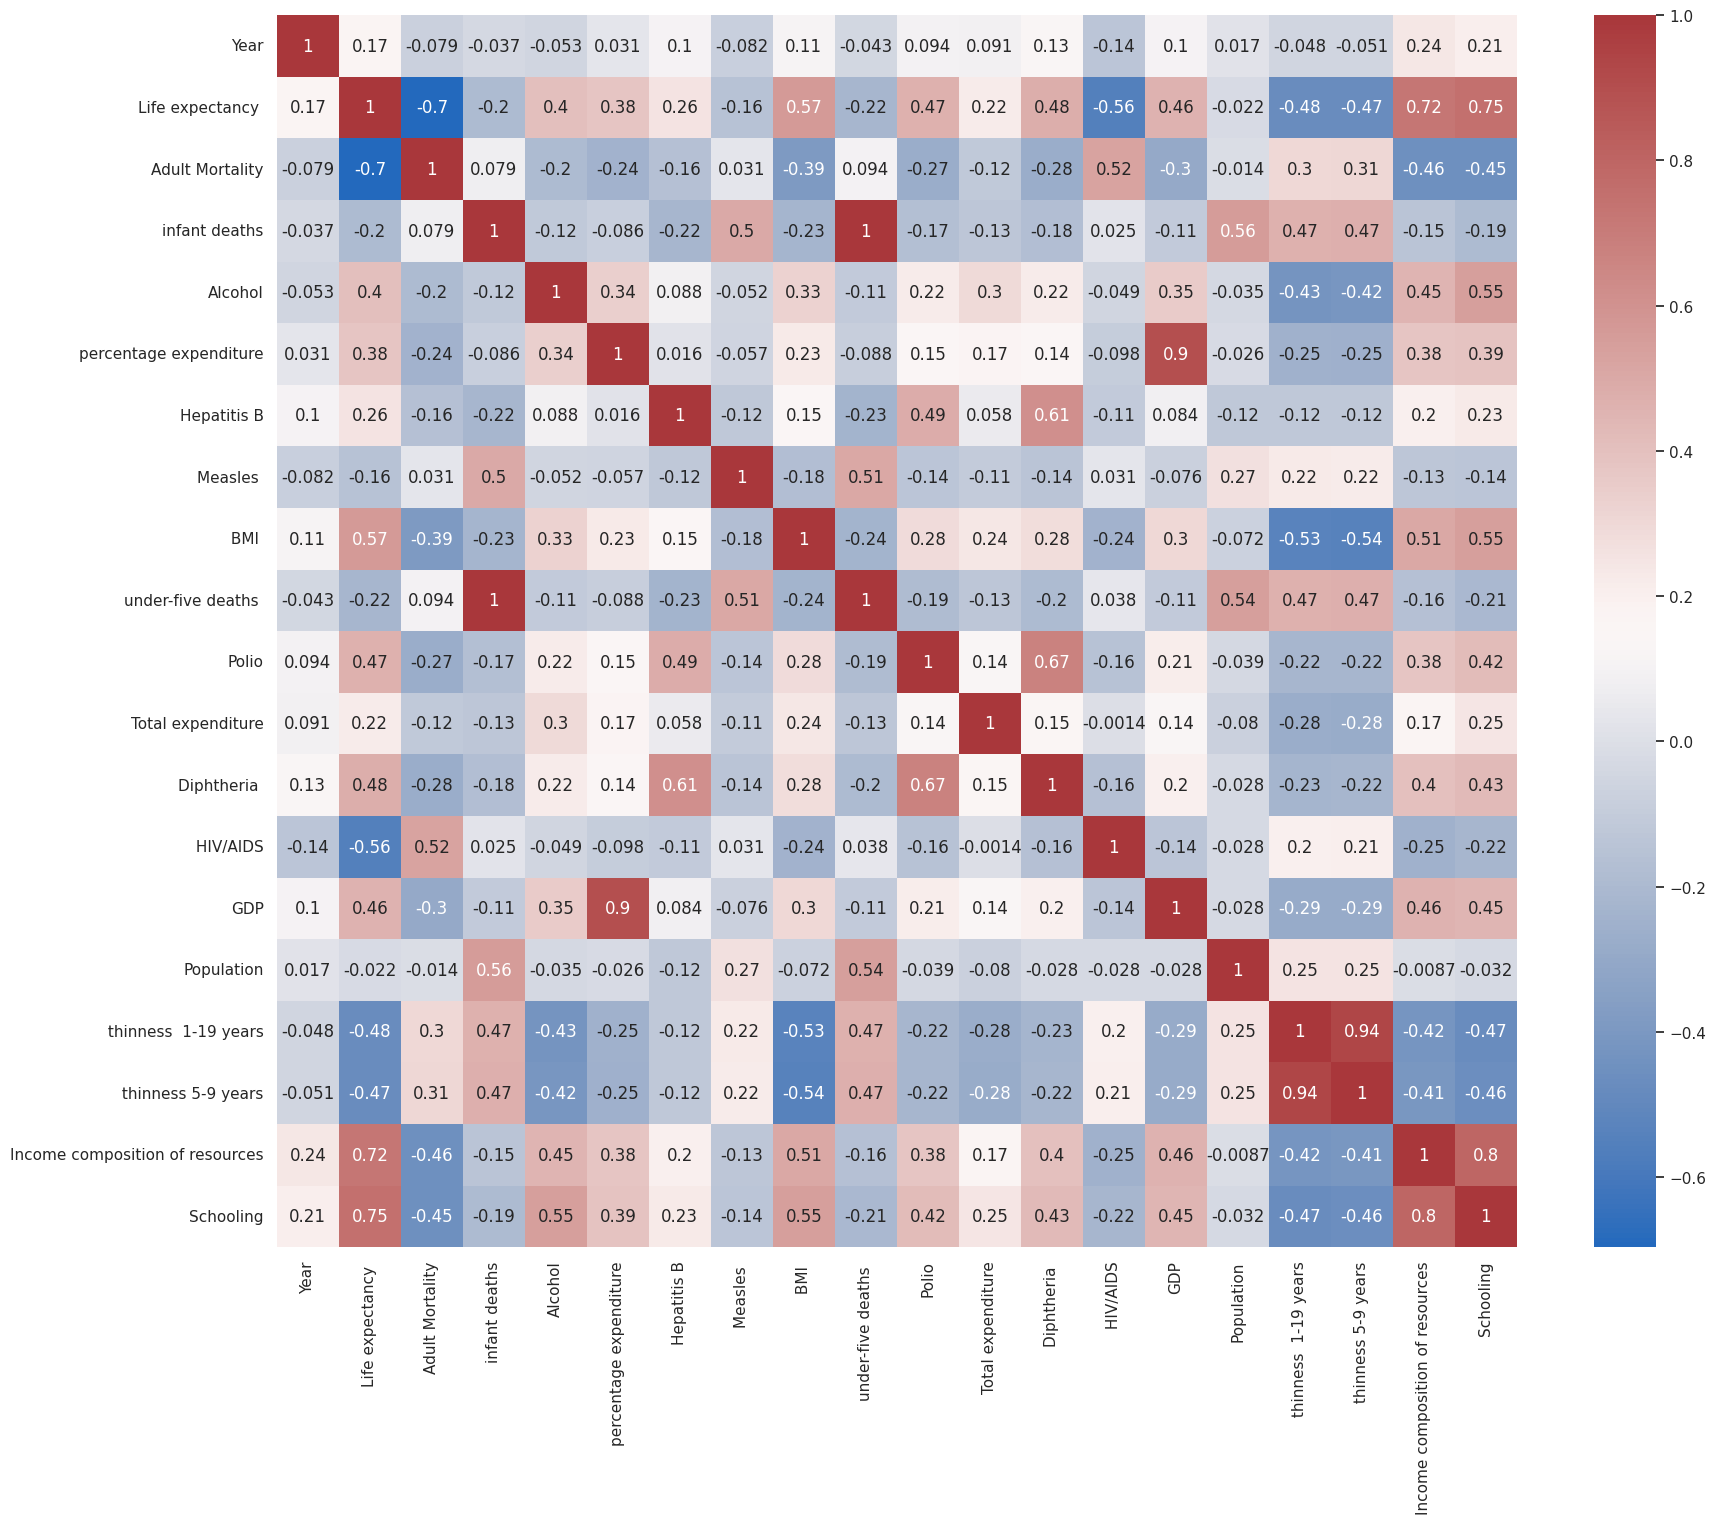

In [100]:
sns.heatmap(data=life_expectancy_data_df.corr(numeric_only=True), annot=True, cmap="vlag");


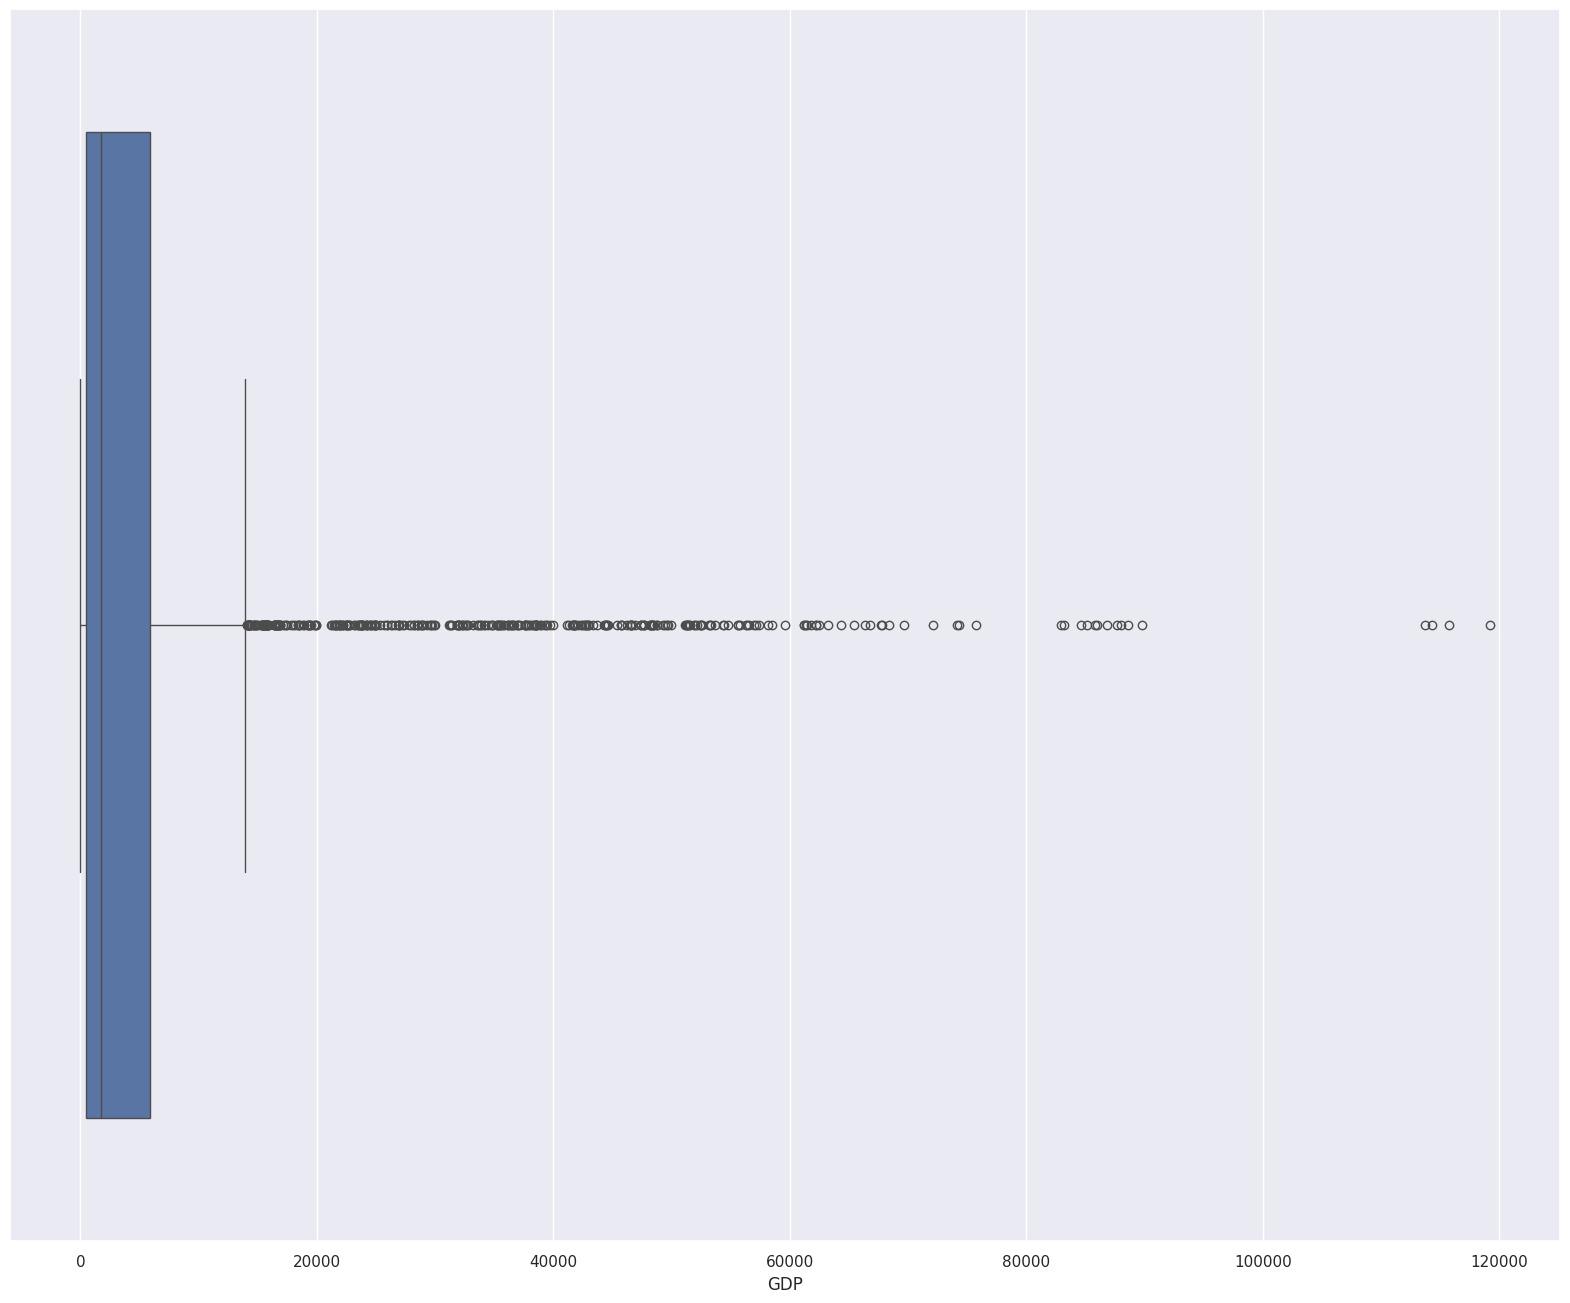

In [101]:
sns.boxplot(x=life_expectancy_data_df['GDP'])
plt.show()


In [102]:
from sklearn.model_selection import train_test_split

In [103]:
X = life_expectancy_data_df[['GDP']]              # Independent variable
y = life_expectancy_data_df['Life expectancy ']    # Dependent variable

In [104]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)


In [105]:
from sklearn.linear_model import LinearRegression


In [106]:
model = LinearRegression()
model.fit(X_train, y_train)

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [107]:
X.isnull().sum()


,0
GDP,448


In [108]:
X = X.fillna(X.mean())

In [109]:
y.isnull().sum()


np.int64(10)

In [110]:
y = y.fillna(y.mean())


In [111]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [112]:
y_pred = model.predict(X_test)


In [113]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
r2


0.22141405159134075

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


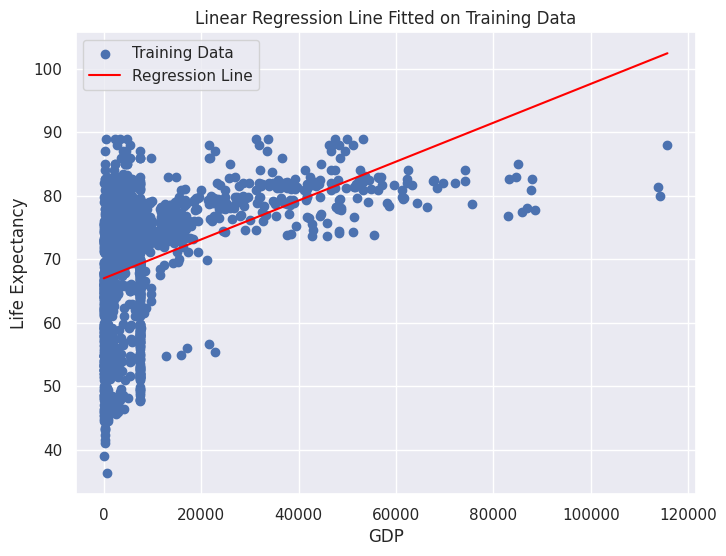

In [114]:
# Scatter plot of training data
plt.figure(figsize=(8,6))
plt.scatter(X_train, y_train, label='Training Data')

# Create values for regression line using training range
X_line = np.linspace(X_train.min(), X_train.max(), 100).reshape(-1, 1)
y_line = model.predict(X_line)

# Plot regression line (learned from training data)
plt.plot(X_line, y_line, color='red', label='Regression Line')

# Labels and title
plt.xlabel('GDP')
plt.ylabel('Life Expectancy')
plt.title('Linear Regression Line Fitted on Training Data')
plt.legend()

plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


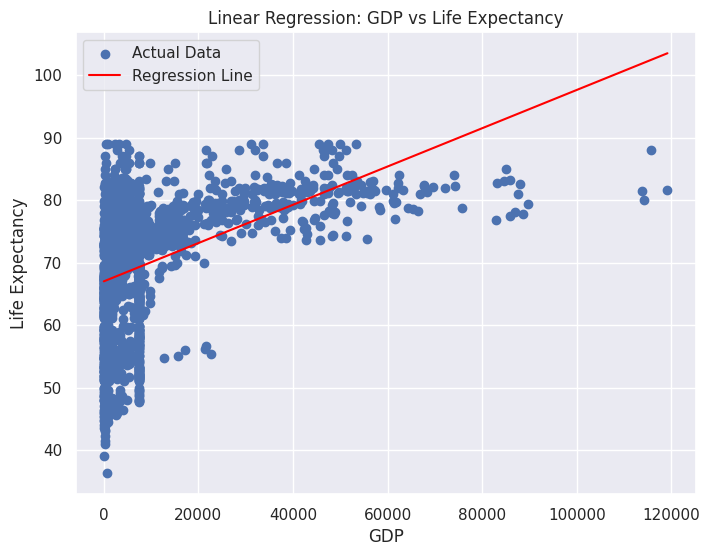

In [115]:
# Scatter plot of actual data
plt.figure(figsize=(8,6))
plt.scatter(X, y, label='Actual Data')

# Create values for regression line
X_line = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_line = model.predict(X_line)

# Plot regression line
plt.plot(X_line, y_line, color='red', label='Regression Line')

# Labels and title
plt.xlabel('GDP')
plt.ylabel('Life Expectancy')
plt.title('Linear Regression: GDP vs Life Expectancy')
plt.legend()

plt.show()

Simple check:

Did I clean the data?

Are relationships linear?

Did I add enough meaningful features?

Are outliers removed?

Can I try other modeling techniques?


In [ ]:
# adding schooling and per cap features

In [116]:
life_expectancy_data_df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [117]:
life_expectancy_data_df['Status'].head()

,Status
0,Developing
1,Developing
2,Developing
3,Developing
4,Developing


In [118]:
life_expectancy_data_df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [119]:
X = life_expectancy_data_df[['GDP','Status']]              # Independent variable
y = life_expectancy_data_df['Life expectancy ']    # Dependent variable

# Convert 'Status' column to numerical using one-hot encoding
X = pd.get_dummies(X, columns=['Status'], drop_first=True)

# Fill NaN values in X and y before splitting
X = X.fillna(X.mean(numeric_only=True))
y = y.fillna(y.mean())

In [120]:
X

,GDP,Status_Developing
0,584.259210,True
1,612.696514,True
2,631.744976,True
3,669.959000,True
4,63.537231,True
...,...,...
2933,454.366654,True
2934,453.351155,True
2935,57.348340,True
2936,548.587312,True


In [121]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)


In [122]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [123]:
y_pred = model.predict(X_test)


In [125]:

r2 = r2_score(y_test, y_pred)
r2


0.3082434120385794

In [126]:
life_expectancy_data_df['Schooling'].head()

,Schooling
0,10.1
1,10.0
2,9.9
3,9.8
4,9.5


In [127]:
life_expectancy_data_df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [128]:
life_expectancy_data_df['GDP_per_schooling'] = life_expectancy_data_df['GDP'] / (life_expectancy_data_df['Schooling'] + 1)


In [129]:
life_expectancy_data_df.shape

(2938, 23)

In [132]:
X = life_expectancy_data_df[['GDP','Status','Schooling']]              # Independent variable
y = life_expectancy_data_df['Life expectancy ']    # Dependent variable

# Convert 'Status' column to numerical using one-hot encoding
X = pd.get_dummies(X, columns=['Status'], drop_first=True)

# Fill NaN values in X and y
X = X.fillna(X.mean(numeric_only=True))
y = y.fillna(y.mean())

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

In [133]:
# Get the coefficients and feature names from the Linear Regression model
coefficients = model.coef_
feature_names = X_train.columns

# Create a DataFrame to display the coefficients
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

display(coefficients_df)

print(f"\nIntercept: {model.intercept_}")

ValueError: All arrays must be of the same length

In [134]:
50.587476418992 + 585.259*0.000080+10.1*1.745270+1*-3.512585

64.748939138992

In [135]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [136]:
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
r2

0.5767242605049878

In [137]:
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor(random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)
r2_rf = r2_score(y_test, y_pred_rf)
print(f'R-squared for Random Forest: {r2_rf}')

R-squared for Random Forest: 0.6482017656711152


# Task
Calculate and report the number of unique countries in the `life_expectancy_data_df` DataFrame that have a 'Life expectancy ' greater than the global mean 'Life expectancy ' for all records in the DataFrame.

## Calculate Global Mean and Filter

### Subtask:
Calculate the global mean of 'Life expectancy ' and then filter the `life_expectancy_data_df` to include only records where the life expectancy is above this mean.


**Reasoning**:
To calculate the global mean of 'Life expectancy ' and then filter the DataFrame to include only records where the life expectancy is above this mean, I will first calculate the mean of the 'Life expectancy ' column and then use it to filter the DataFrame as instructed.



In [138]:
global_mean_life_expectancy = life_expectancy_data_df['Life expectancy '].mean()
df_above_mean_life_expectancy = life_expectancy_data_df[life_expectancy_data_df['Life expectancy '] > global_mean_life_expectancy]

print(f"Global Mean Life Expectancy: {global_mean_life_expectancy:.2f}")
print(f"Shape of DataFrame with life expectancy above mean: {df_above_mean_life_expectancy.shape}")

Global Mean Life Expectancy: 69.22
Shape of DataFrame with life expectancy above mean: (1696, 23)


**Reasoning**:
To complete the subtask, I will calculate the number of unique countries in the filtered DataFrame `df_above_mean_life_expectancy` and print the result. This directly addresses the main task's requirement to report the number of unique countries with above-mean life expectancy.



In [140]:
num_unique_countries_above_mean = df_above_mean_life_expectancy['Country'].nunique()
print(f"Number of unique countries with life expectancy above global mean: {num_unique_countries_above_mean}")

Number of unique countries with life expectancy above global mean: 120


## Final Task

### Subtask:
Report the final count of unique countries with above-global-mean life expectancy.


## Summary:

### Q&A
The number of unique countries with above-global-mean life expectancy is 120.

### Data Analysis Key Findings
*   The global mean life expectancy across all records in the dataset was calculated to be approximately 69.22 years.
*   After filtering, the dataset contained 1696 records with a life expectancy greater than the global mean.
*   There are 120 unique countries that have a 'Life expectancy ' above the global mean.

### Insights or Next Steps
*   Further analysis could involve identifying which specific countries or regions consistently fall into the "above-global-mean" category to understand common factors contributing to higher life expectancies.
*   Investigate the distribution of these 120 countries to see if there are geographical or economic patterns among them.
